In [94]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [95]:
def rho_red_light(nx, rho_max, rho_in):
    #initial condition#
    rho = rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3./4.)] = rho_in
    return rho

In [96]:
nx = 81
nt = 30
dx = 4./(nx-1)

rho_in = 5
rho_max = 10

u_max = 1
x = numpy.linspace(0, 4, nx)
rho0 = rho_red_light(nx, rho_max, rho_in)  #initial condition
sigma = 1.
dt = sigma*dx/u_max

In [97]:
def computeF(u_max, rho_max, rho):
    return u_max*rho*(1-rho/rho_max)

In [98]:
from matplotlib import animation
from IPython.display import HTML

In [99]:
def animate(data):
    x = numpy.linspace(0, 4, nx)
    y = data
    line.set_data(x,y)
    return line,

In [100]:
def suanLF(nt, nx, rho0, ):
    #xian ba chushitiaojian dairu,gei rho_n
    rho = numpy.zeros((nt, nx))
    rho[0,] = rho0.copy()
    rho_n = numpy.zeros(nx)
    rho_n = rho0.copy()
    #kai suan
    for t in range(1, nt):
        
        F = computeF(u_max, rho_max, rho_n)
        rho_n[1:-1] = 1/2 * (rho_n[2:] + rho_n[:-2])\
                      - dt/(2*dx)*(F[2:] - F[:-2])
        rho[t,:] = rho_n.copy()
    return rho
    

In [101]:
rho = suanLF(nt, nx, rho0)

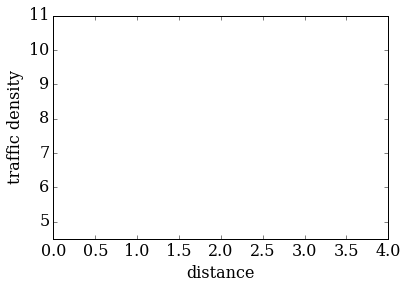

In [102]:
fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,4), ylim = (4.5, 11), xlabel = ('distance'), ylabel = ('traffic density'));
line = ax.plot([],[],color='#003366',lw = 2);

In [103]:
anim = animation.FuncAnimation(fig, animate, frames=rho, interval=50)
HTML(anim.to_html5_video())

AttributeError: 'list' object has no attribute 'set_data'

In [88]:
a = suanLF(nt, nx, rho0)

In [89]:
a[-1,]

array([  5.        ,   5.        ,   5.        ,   5.        ,
         5.        ,   5.        ,   5.        ,   5.        ,
         5.        ,   5.        ,   5.        ,   5.        ,
         5.        ,   5.        ,   5.        ,   5.        ,
         5.        ,   5.        ,   5.        ,   5.        ,
         5.        ,   5.        ,   5.        ,   5.        ,
         5.        ,   5.        ,   5.        ,   5.        ,
         5.        ,   5.        ,   5.        ,   5.00000003,
         5.00000003,   5.00000134,   5.00000134,   5.0000278 ,
         5.0000278 ,   5.00042215,   5.00042215,   5.00542959,
         5.00542959,   5.06380487,   5.06380487,   5.63924736,
         5.63924736,   8.13050577,   8.13050577,   9.91058704,
         9.91058704,   9.99997403,   9.99997403,  10.        ,
        10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,  10.        ,  10.  

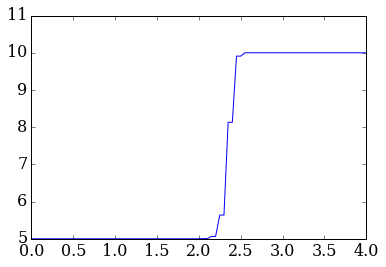

In [93]:
pyplot.plot(x, a[-5,])